# Práctica 2. Grafos

## Práctica 2.1
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?
3. Explique el algoritmo.
4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.
* Muestre la imagen del grafo con sus:
  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

2. Este algoritmo sirve para encontrar la ruta mas corta entre los nodos de un grafo partiendo de un nodo de origen con etiqueta [0,-].
3. Comenzariamos desde el nodo de origen con etiqueta [0,-]. Para pasar al nodo 2 con un vertice de distancia 4 deberiamos, en primer lugar sumar el 0 mas la distancia entre nodos. Lo segundo seria cambiar el "-" por el nodo de orgiden, es decir, 1. Por ultimo indicamos al lado en que interseccion nos encontramos. De modo que la etiqueta del nodo 2 seria [4,1]1
4.

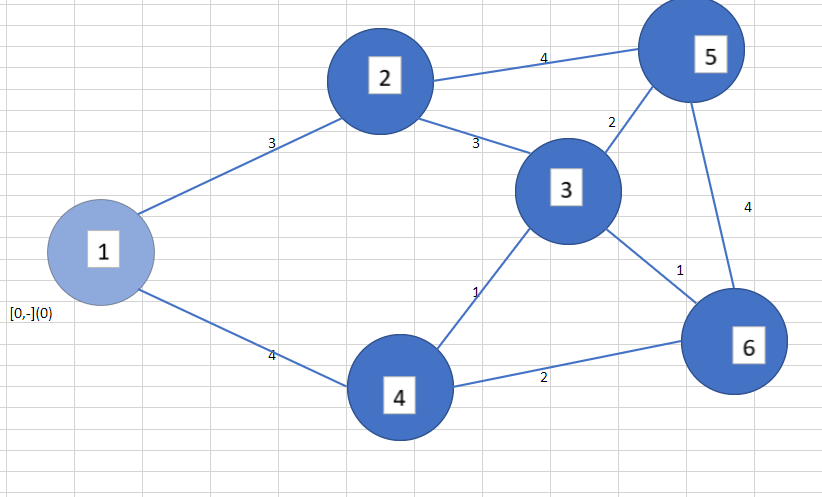

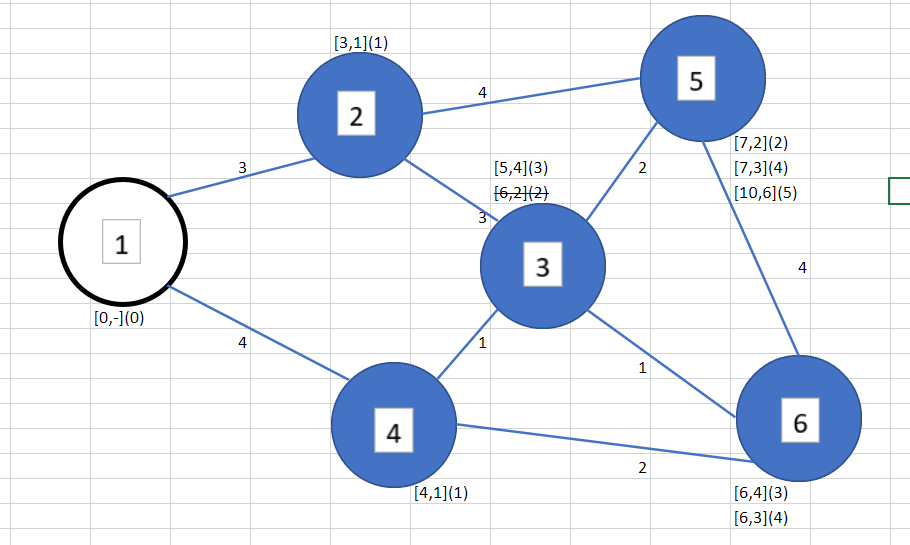

## Práctica 2.2
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

Al activar la opcion de Solver no me aparece en el apartado de datos y no he encontrado solucion.

## Práctica 2.3
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.
2. Pruebe su código con algún grafo de ejemplo.

https://www.techiedelight.com/es/single-source-shortest-paths-dijkstras-algorithm/

In [1]:
import sys
from heapq import heappop, heappush
 
 
# Una clase para almacenar un nodo de heap
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight
 
    # Anule la función __lt__() para hacer que la clase `Node` funcione con un min-heap
    def __lt__(self, other):
        return self.weight < other.weight
 
 
# Una clase para representar un objeto graph
class Graph:
    def __init__(self, edges, n):
        # asigna memoria para la lista de adyacencia
        self.adjList = [[] for _ in range(n)]
 
        # agrega bordes al graph dirigido
        for (source, dest, weight) in edges:
            self.adjList[source].append((dest, weight))
 
 
def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)
 
 
# Ejecutar el algoritmo de Dijkstra en un graph dado
def findShortestPaths(graph, source, n):
 
    # crea un min-heap y empuja el nodo de origen con una distancia de 0
    pq = []
    heappush(pq, Node(source))
 
    # establece la distancia inicial desde la fuente a `v` como infinito
    dist = [sys.maxsize] * n
 
    # distancia de la fuente a sí mismo es cero
    dist[source] = 0
 
    # Lista # para rastrear vértices para los cuales ya se encontró el costo mínimo
    done = [False] * n
    done[source] = True
 
    # almacena el predecesor de un vértice (en una ruta de impresión)
    prev = [-1] * n
 
    # se ejecuta hasta que el min-heap esté vacío
    while pq:
 
        node = heappop(pq)      # Quitar y devolver el mejor vértice
        u = node.vertex         # obtener el número de vértice
 
        # hacer para cada vecino `v` de `u`
        for (v, weight) in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:        # Escalón de relajación
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))
 
        # marca el vértice `u` como hecho para que no se vuelva a recoger
        done[u] = True
 
    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f'Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}')
            route.clear()
 
 
if __name__ == '__main__':
 
    # inicializa los bordes según el diagrama anterior
    # (u, v, w) representa la arista del vértice `u` al vértice `v` con peso `w`
    edges = [(0, 1, 10), (0, 4, 3), (1, 2, 2), (1, 4, 4), (2, 3, 9), (3, 2, 7),
            (4, 1, 1), (4, 2, 8), (4, 3, 2)]
 
    # número total de nodos en el graph (etiquetados de 0 a 4)
    n = 5
 
    # graph de construcción
    graph = Graph(edges, n)
 
    # ejecuta el algoritmo de Dijkstra desde cada nodo
    for source in range(n):
        findShortestPaths(graph, source, n)
 


Path (0 —> 1): Minimum cost = 4, Route = [0, 4, 1]
Path (0 —> 2): Minimum cost = 6, Route = [0, 4, 1, 2]
Path (0 —> 3): Minimum cost = 5, Route = [0, 4, 3]
Path (0 —> 4): Minimum cost = 3, Route = [0, 4]
Path (1 —> 2): Minimum cost = 2, Route = [1, 2]
Path (1 —> 3): Minimum cost = 6, Route = [1, 4, 3]
Path (1 —> 4): Minimum cost = 4, Route = [1, 4]
Path (2 —> 3): Minimum cost = 9, Route = [2, 3]
Path (3 —> 2): Minimum cost = 7, Route = [3, 2]
Path (4 —> 1): Minimum cost = 1, Route = [4, 1]
Path (4 —> 2): Minimum cost = 3, Route = [4, 1, 2]
Path (4 —> 3): Minimum cost = 2, Route = [4, 3]


## Práctica 2.4
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Usando Python, suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.


In [ ]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0,1,1,1,0,1,1,0,0],[1,0,0,1,0,0,1,1,0],[1,0,0,1,0,0,0,0,0],[1,1,1,0,1,0,0,0,0],[0,0,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,1],[1,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0]]
print(convert_to_adjacency(matrix))

In [ ]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1,2,3,5,6],[0,3,6,7],[0,3],[0,1,2,4],[3,5,8],[0,4,8],[0,1],[1],[4,5]]
print(convert_to_matrix(lst))

* Dibuja un grafo que tenga un mínimo de 6 nodos

* Crea en **Python** su **matriz de adyacencia**

* Crea en Python su **lista de adyacencia**

* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.

* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.

* Usando Python, suma todos los valores de la matriz

* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.

* Dibuja el grafo del ejemplo que se usa en este código.
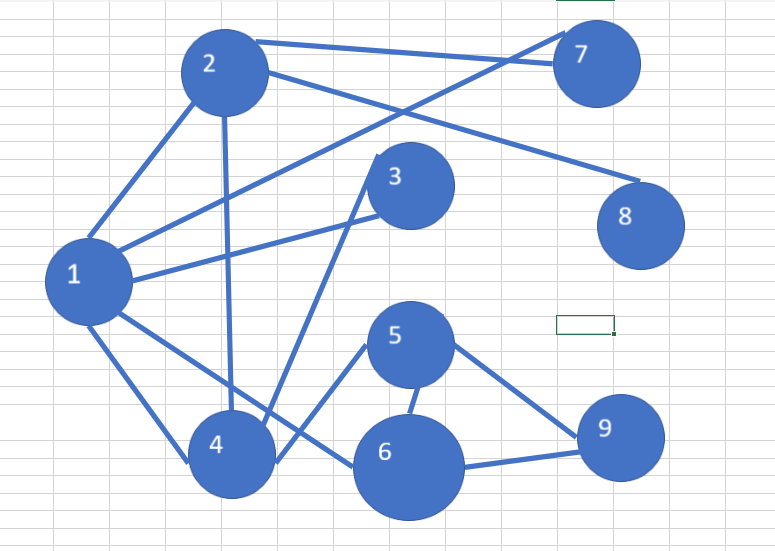

## Práctica 2.5
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
* ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))

Es un arbol binario que presenta de forma ordenada una estructura de datos usada en la informatica

* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
* Qué significa recorrer el árbol en:
 - preorden: Se seguiria el camino raiz, rama izquierda, rama derecha.
 - inorden: Se sigue el camino rama izquierda, raiz, rama derecha.
 - postorden: Se sigue el camino rama izquierda, rama derecha y raiz.
* Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:
 - preorden
 - inorden (observa que en este caso los nodos deben quedar **ordenados** de menor a mayor)
 - postorden
 
 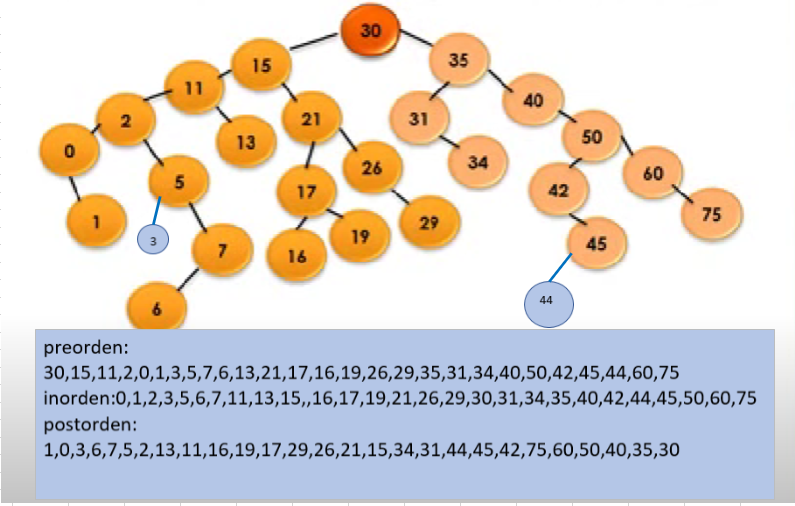
* ¿Por qué los BST son importantes en ciencias de la computación?

Porque sirven para ordenar datos numericos en la computacion.

* Pon un link a una página o vídeo que trate este tema en **Python**.

https://www.youtube.com/watch?v=ph5HPNvWaCk

* ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?
Si, tuve que cambiarlo porque con otros numeros me daba error.


## Práctica 2.6
* ¿Qué es un **camino hamiltoniano**?

Un camino hamiltoniano es aquel en el que los vertices son visitados una sola vez
* Pon un ejemplo
* Dibújalo
* Resulevelo

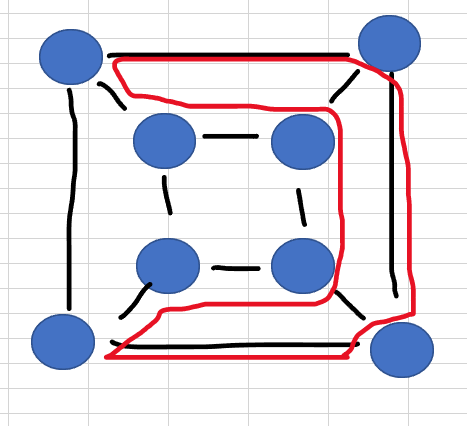
* ¿Qué utilidad tiene?

Se pueden emplear ciclos hamiltonianos, por ejemplo, para aumentar la eficiencia a la hora de repartir paquetes. Si suponemos que cada vertice es una ciudad en la que repartir, podemos encontrar el camino para no repetir ciudad y asi aumentar la eficiencia del viaje.
* Muestra los enlaces a un par de vídeos que hablen de ello

https://www.youtube.com/watch?v=0gt9XewRqLo

https://www.youtube.com/watch?v=ueE7IAfLmqk

## Práctica 2.7
* Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)
* Dibuja el grafo y da tu solución


Tras mas de 30min tratando de buscar una solucion debo asumir que este ejercicio no dispone de solucion, pues si que se puede llegar a todos los puntos sin repetir nodo, pero no se puede volver al nodo de inicio.

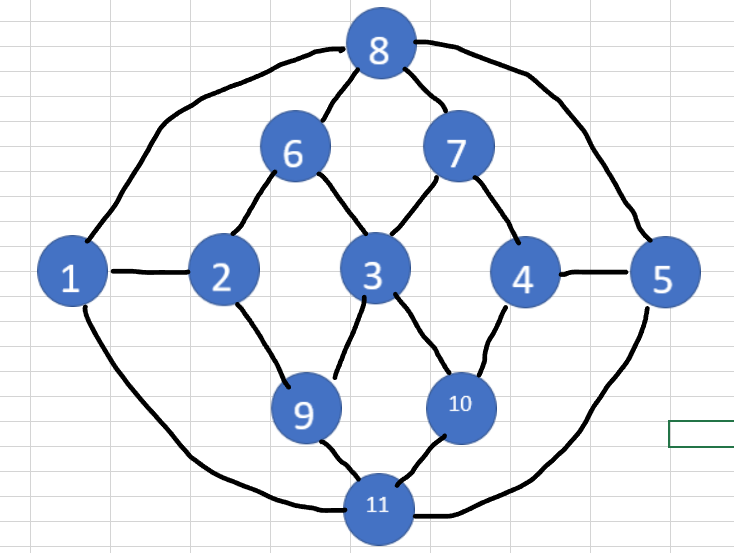 

## Práctica 2.8
* El problema de **los puentes de Königsberg**
* Describe el problema

El problema trata de un conjunto de nodos unidos por vertices en el cual debemos descubrir si existe un camino que comience desde uno de los puintos, recorra todos los caminos una sola vez y regrese al nodo de inicio.

* Muestra una imagen del grafo resultante

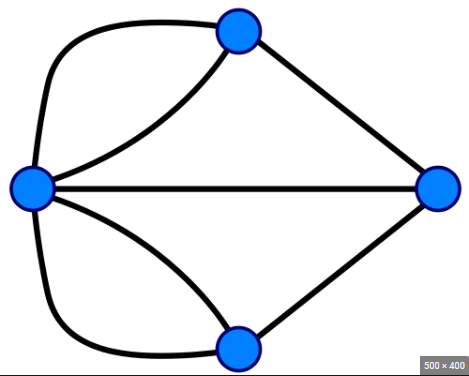
* Quién fue *Euler* y qué hizo para resolver el problema

Euler fue un famoso matematico y fisico del siglo 18 el cual resolvió el problema de los puentes de konigsberg en 1736, dando origen a la teoría de grafos. Para "resolver" este problema Euler hizo un dibujo mas simple y elegante del problema(El mostrado en la imagen). De esta manera explico que, para poder resolver el problema, los vertices debian poseer un numero par de aristas, con el cual poder entrar y salir, dando como resultado que no hay forma de resolver el problema.

## Práctica 2.9
* ¿Qué son los **caminos eulerianos**?

El camino euleriano es aquella ruta que pasa por cada arista una sola vez.
* ¿Qué son los **ciclos eulerianos**?

Un ciclo euleriano es aquella ruta cerrada que pasa por cada arista una sola vez y vuelve al punto de inicio.
* Da los enlaces a dos vídeos que hablen de ello

https://www.youtube.com/watch?v=57yhBHFCb7w

https://www.youtube.com/watch?v=w8d-4FyrbYk

* Dibuja un par de casos

Ciclo:

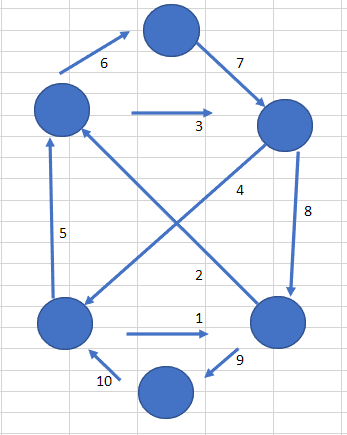

Camino:

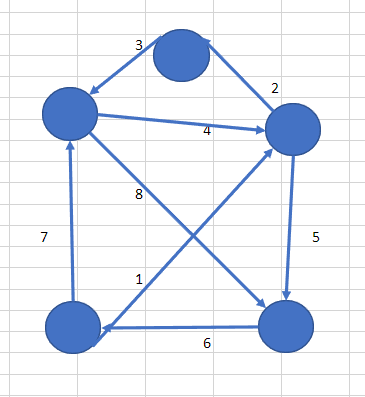

## Práctica 2.10
* Mira estos vídeos:
 - [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
 - [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)
* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo

Caso 1:

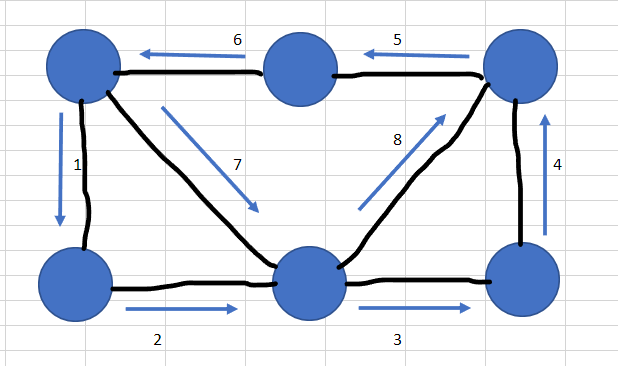

Caso 2:
En este caso seria imposible ya que no hay forma de conectar todos los nodos sin que repitamos arista ya que encontramos que hay 4 vertices impares

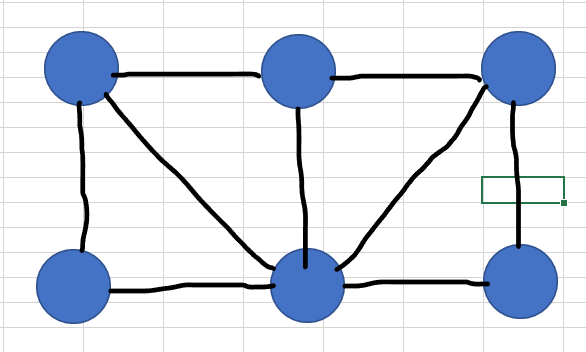